In [1]:

import numpy as np
import matplotlib.pyplot as plt

Let's get the 50th image in this list of files, and then read the file at that location as an image, setting the result to a variable, `img`, and inspect a bit further what's going on:

In [3]:
#files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np
import os

#print(os.path.join('img_align_celeba', files[0]))
#plt.imread(os.path.join('img_align_celeba', files[0]))

files = [f'./flowers_imitation/{i}.png' for i in range(300)]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[99])

print(img.shape)

(300, 300, 3)


When I print out this image, I can see all the numbers that represent this image.  We can use the function `imshow` to see this:

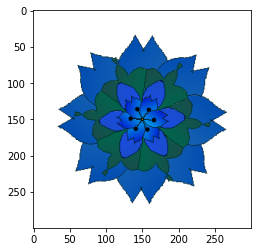

In [4]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

<a name="understanding-image-shapes"></a>
## Understanding Image Shapes

Let's break this data down a bit more.  We can see the dimensions of the data using the `shape` accessor:

In [5]:
img.shape
# (218, 178, 3)

(300, 300, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB.  Let's try looking at just one of the color channels.

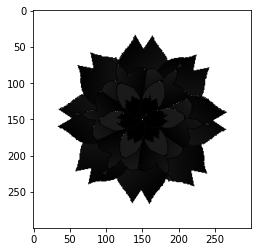

In [6]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

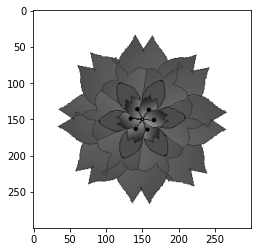

In [7]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

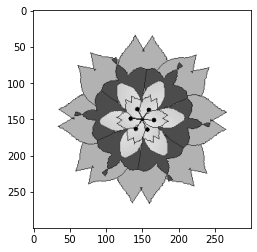

In [8]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

We use the special colon operator to say take every value in this dimension.  This is saying, give me every row, every column, and the 0th dimension of the color channels.  What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

Let's use another helper function which will load every image file in the celeb dataset rather than just give us the filenames like before.  By default, this will just return the first 100 images because loading the entire dataset is a bit cumbersome.  In one of the later sessions, I'll show you how tensorflow can handle loading images using a pipeline so we can load this same dataset.  For now, let's stick with this:

In [17]:
imgs = [plt.imread(files[file_i])
        for file_i in range(200)]

#imgs = utils.get_celeb_imgs() # nope nope nope

We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

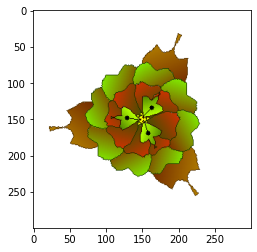

In [18]:
plt.imshow(imgs[29])

In [19]:
len(imgs)

200

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [21]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print(f"The shape of our new 'data' object is a 'batch' of {data.shape[0]} images, with a height of {data.shape[1]}, width of {data.shape[2]}, and {data.shape[3]} colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(200, 300, 300, 3)
The shape of our new 'data' object is a 'batch' of 200 images, with a height of 300, width of 300, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


In [27]:
mean_img = np.mean(data, axis=0)
mean_img[100,100,:]

array([0.4729018, 0.4053922, 0.4595296], dtype=float32)

look at this average flower


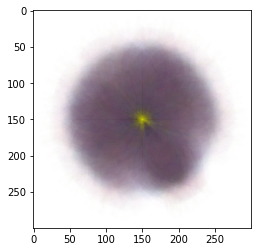

In [29]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img)
print("look at this average flower")

This is the first step towards building our robot overlords.  We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like.  There is one other very useful statistic which we can look at very easily:

This is the standard deviation - the variance of the mean


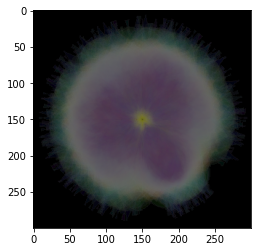

In [30]:
std_img = np.std(data, axis=0)
plt.imshow(std_img)
print("This is the standard deviation - the variance of the mean")

So this is incredibly cool.  We've just shown where changes are likely to be in our dataset of images.  Or put another way, we're showing where and how much variance there is in our previous mean image representation.

We're looking at this per color channel.  So we'll see variance for each color channel represented separately, and then combined as a color image.  We can try to look at the average variance over all color channels by taking their mean:

Mean of all colour channels


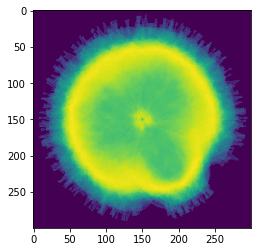

In [31]:
plt.imshow(np.mean(std_img, axis=2)) # Mean of all colour channels
print("Mean of all colour channels")

In [17]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[186 168 166]
   [181 166 163]
   [180 166 163]
   ...
   [173 156 149]
   [188 173 170]
   [139 124 121]]

  [[186 168 166]
   [181 166 163]
   [180 166 163]
   ...
   [167 150 143]
   [187 172 169]
   [144 129 126]]

  [[186 168 166]
   [181 166 163]
   [179 165 162]
   ...
   [154 137 130]
   [181 166 163]
   [149 134 131]]

  ...

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [108  59  42]
   [ 91  64  35]
   [ 91  64  35]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [100  53  35]
   [ 82  55  26]
   [ 87  60  31]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [ 99  54  35]
   [ 82  55  26]
   [ 87  60  31]]]]
[186 168 166 181 166 163 180 166 163 183]


We first convert our N x H x W x C dimensional array into a 1 dimensional array.  The values of this array will be based on the last dimensions order.  So we'll have: [<font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>205</font>, <font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>206</font>, <font color='red'>253</font>, <font color='green'>240</font>, <font color='blue'>207</font>, ...]

We can visualize what the "distribution", or range and frequency of possible values are.  This is a very useful thing to know.  It tells us whether our data is predictable or not.

(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

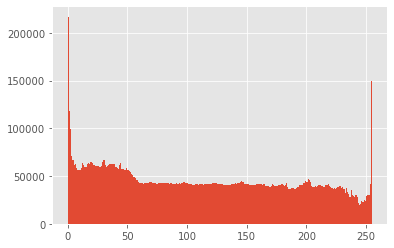

In [18]:
plt.hist(flattened.ravel(), 255)

(array([   2.,    0.,    0.,    0.,    2.,   18.,   30.,   23.,   42.,
          42.,   43.,   41.,   51.,   48.,   30.,   52.,   58.,   59.,
          67.,   67.,   71.,   83.,   94.,  110.,  110.,  107.,  134.,
         103.,  109.,  160.,  198.,  206.,  211.,  265.,  306.,  289.,
         344.,  335.,  361.,  382.,  402.,  390.,  400.,  497.,  544.,
         594.,  663.,  679.,  749.,  803.,  847.,  882.,  886.,  938.,
         817.,  857.,  801.,  825.,  831.,  896.,  875.,  861.,  843.,
         870.,  842.,  897.,  863.,  861.,  906.,  939.,  905.,  935.,
         946.,  972., 1004., 1064., 1079., 1124., 1162., 1103., 1129.,
        1108., 1085., 1079., 1051., 1155., 1068., 1093., 1170., 1171.,
        1146., 1213., 1146., 1174., 1211., 1229., 1173., 1196., 1216.,
        1150., 1255., 1373., 1344., 1445., 1554., 1554., 1553., 1478.,
        1506., 1469., 1546., 1626., 1659., 1568., 1548., 1559., 1576.,
        1376., 1283., 1189., 1151., 1093., 1046., 1068., 1021., 1059.,
      

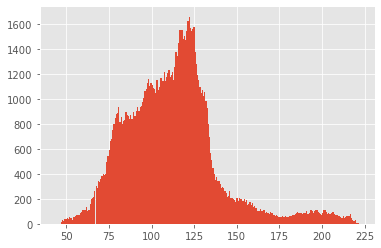

In [19]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it.  And that means that the rest of the information is really what is important for describing what is unique about it.

Let's try and compare the histogram before and after "normalizing our data":

Text(0.5, 1.0, '(img - mean) distribution')

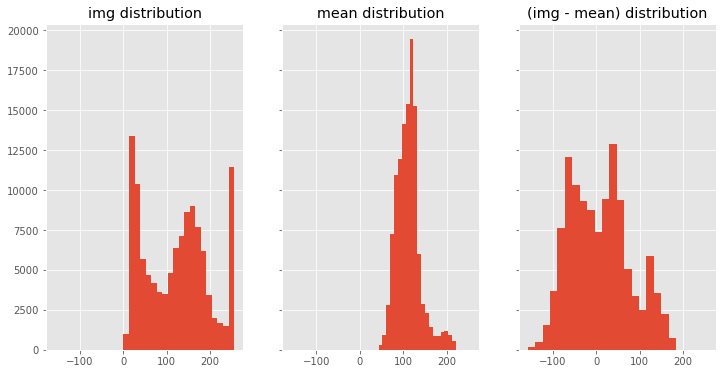

In [20]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

What we can see from the histograms is the original image's distribution of values from 0 - 255.  The mean image's data distribution is mostly centered around the value 100.  When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now centered around 0.  What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it.  Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset:

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

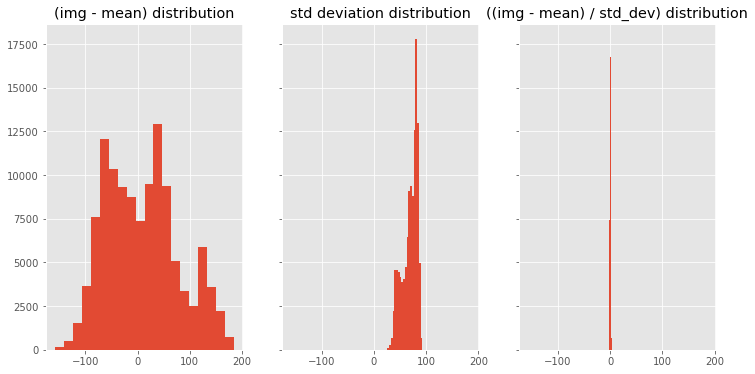

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

Now our data has been squished into a peak!  We'll have to look at it on a different scale to see what's going on:

In [22]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5.0, 5.0)